![alt text](image.png "ok")

## <font color=green> 1) Appliquer plusieurs algorithmes de bruitage sur une image </font>

In [1]:
#Installation de la bilbliothéque "OPEN-CV"
!pip install opencv-python

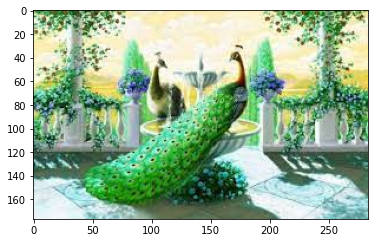

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('ahlem.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('ahlem2.jpg', quant)
plt.imshow(image)

cv2.imread('ahlem.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

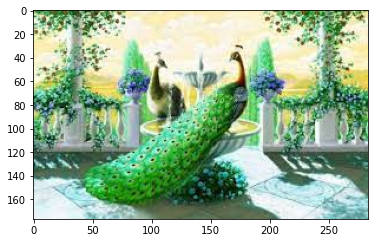

In [3]:
plt.imshow(image)

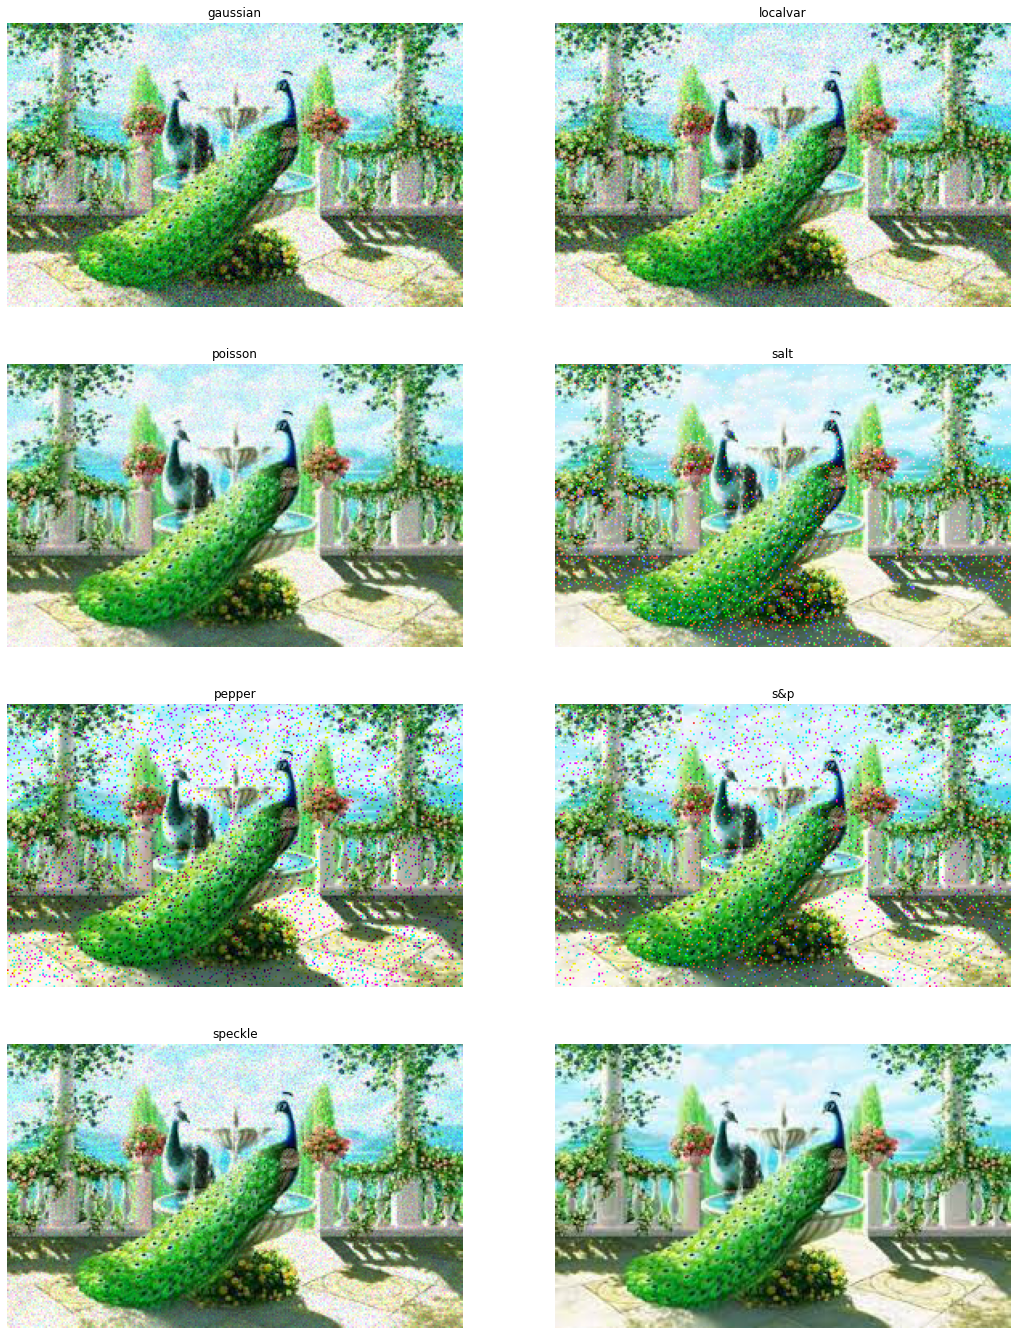

In [4]:
import skimage.io
import matplotlib.pyplot as plt
img_path="ahlem.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

<font color=red>***RQ: Il y'a plusieurs fonction d'élimination de bruit avec skimage pour restaurer les images bruitées:</font>

>skimage.restoration.denoise_bilateral(image).

>skimage.restoration.denoise_nl_means(image).

>skimage.restoration.denoise_tv_chambolle(image).

>skimage.restoration.denoise_wavelet(image).

## <font color=green> 2) Appliquer un filtre sur chaque résultat obtenue </font>

### **Filtrage sur l'image sous bruit "s&p"

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x200ecf202e0>)

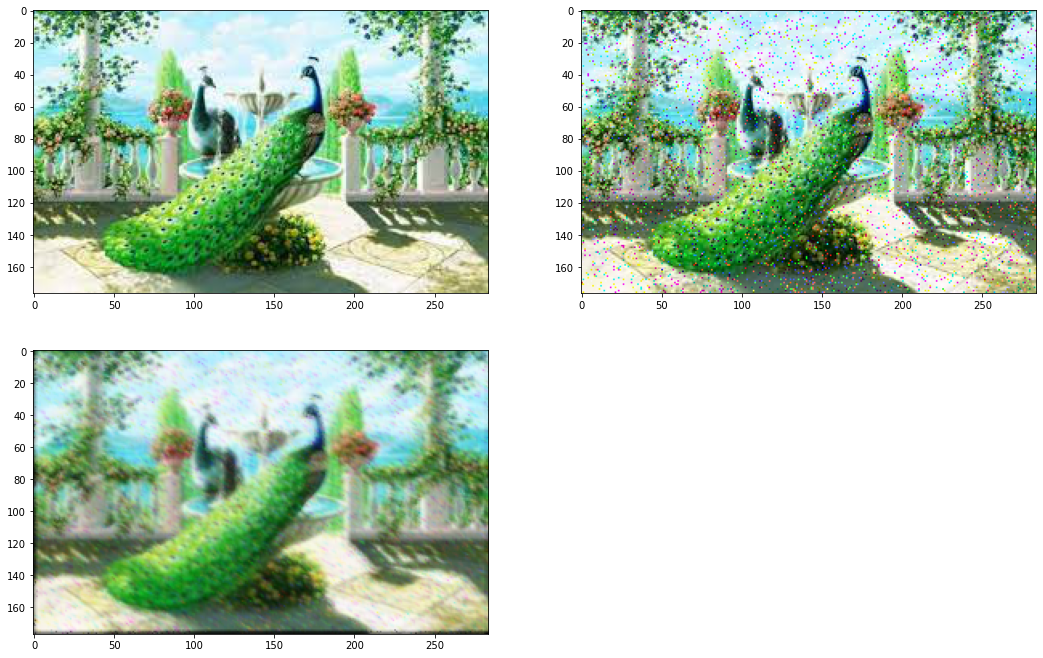

In [5]:
from skimage.restoration import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="ahlem.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)

# Add noise to the image
spImg = skimage.util.random_noise(img, mode="s&p")
plt.subplot(4, 2, 2),plt.imshow(spImg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(spImg, multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)

### **Filtrage sur l'image sous bruit "gaussian"

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x200ecccc370>)

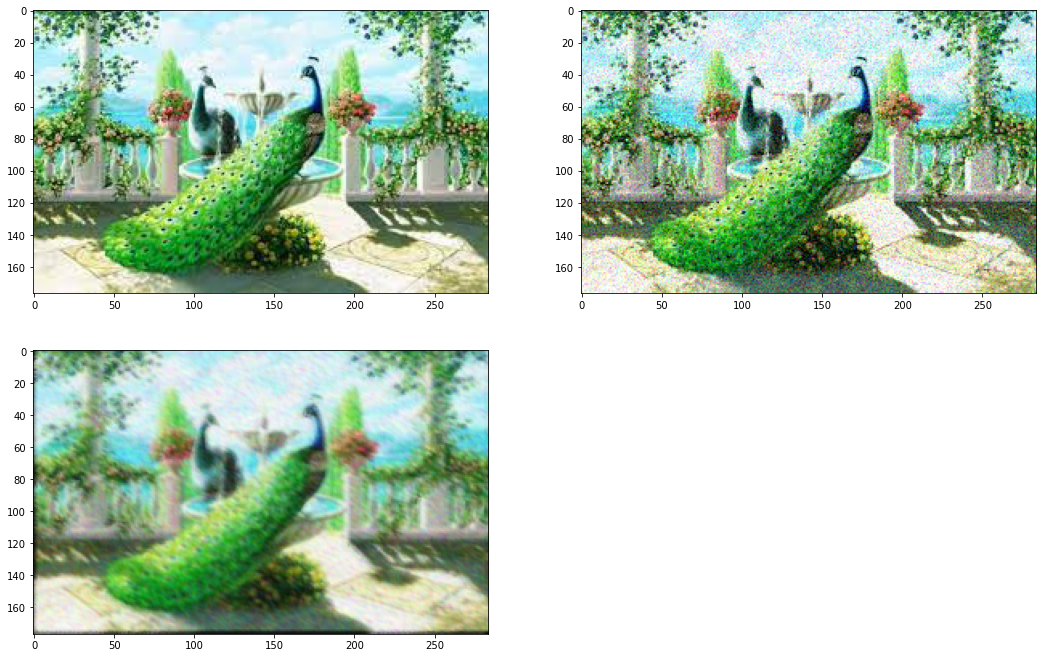

In [6]:
from skimage.restoration import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="ahlem.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)

# Add noise to the image
spImg = skimage.util.random_noise(img, mode="gaussian")
plt.subplot(4, 2, 2),plt.imshow(spImg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(spImg, multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)

### **Filtrage sur l'image sous bruit "salt"

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x200ebf6b9a0>)

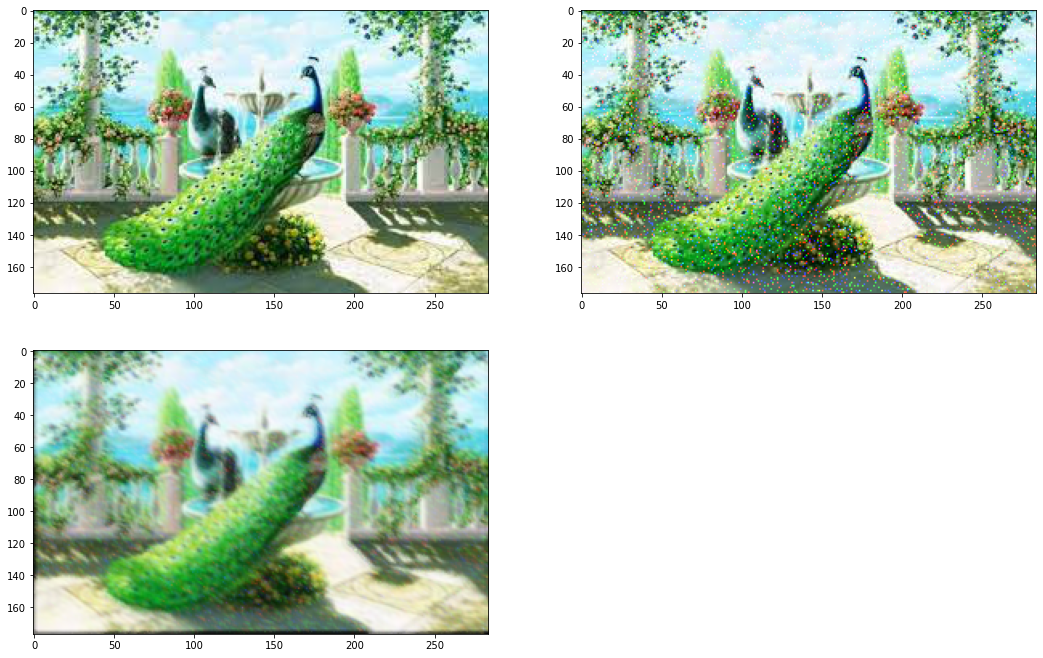

In [7]:
from skimage.restoration import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="ahlem.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)

# Add noise to the image
spImg = skimage.util.random_noise(img, mode="salt")
plt.subplot(4, 2, 2),plt.imshow(spImg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(spImg, multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)

## <font color=green> 3) Appliquer la méthode de Cluserting de votre choix sur toutes les images </font>

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
original_image = cv2.imread("ahlem.jpg")


In [10]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [11]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [12]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [13]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [14]:
center = np.uint8(center)

In [15]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

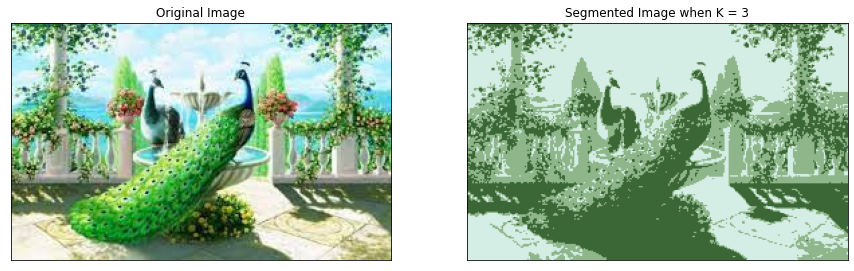

In [16]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


### <font color=red>Voyons ce qui se passe lorsque nous changeons la valeur de K = 10:</font>

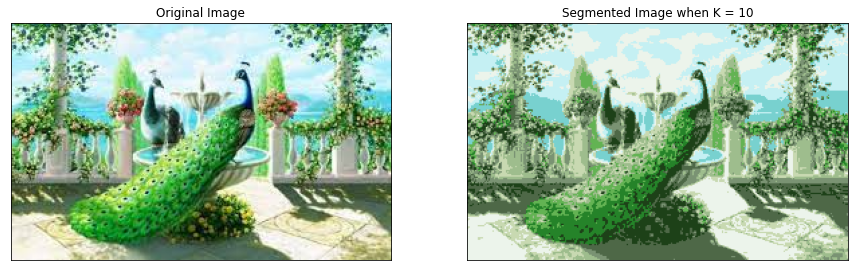

In [17]:
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

## <font color=green>4) Comparer les résultats</font>

> ### On remarque que lorsque le nombre de clusters k = 3, on trouve l'image floue (image comme noir et blanc), et à chaque fois qu'on augmente le nombre de clusters comme ci-dessus k=10, l'image segmentée sera plus proche à l'image originale